In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
import os
os.listdir("C:/Users/282512/LF")
data = pd.read_csv('C:/Users/282512/LF/testss.csv', sep=',')
#delete the unwanted data
del data['25']
del data['Unnamed: 28']
data.shape
data.head()


,VID,VTYPE,DATE,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,OETC,LOAD,06-20-2016,4772.0,4818.0,4877.0,4784.0,4655.0,4464.0,4270.0,...,5277.0,5274.0,5109.0,4754.0,4413.0,4349.0,4551.0,4637.0,4581.0,4551.0
1,OETC,LOAD,06-21-2016,4752.0,4959.0,4902.0,4926.0,4888.0,4711.0,4445.0,...,5251.0,5577.0,5376.0,4898.0,4531.0,4339.0,4689.0,4781.0,4700.0,4764.0
2,OETC,LOAD,06-22-2016,4813.0,4925.0,4892.0,4851.0,4960.0,4824.0,4572.0,...,5352.0,5682.0,5441.0,4974.0,4797.0,4487.0,4748.0,4805.0,4753.0,4756.0
3,OETC,LOAD,06-23-2016,4937.0,5093.0,5136.0,5063.0,4815.0,4606.0,4438.0,...,5389.0,5526.0,5298.0,4681.0,4564.0,4295.0,4434.0,4516.0,4466.0,4482.0
4,OETC,LOAD,06-24-2016,4750.0,4961.0,5033.0,4933.0,4695.0,4592.0,4336.0,...,5043.0,5055.0,4810.0,4459.0,4228.0,3923.0,4138.0,4228.0,4175.0,4226.0


In [489]:
#data[Null_columns].isnull().sum() [SaB] sum all the null values in a column
#data_new = data.dropna()
#data_new.shape
#data.iloc[569]
#data.head()
#data.head()

In [6]:
Load_filter = data['VTYPE'].str.contains('LOAD')
Temp_filter = data['VID'].str.contains('TEMP')
Hum_filter =  data['VID'].str.contains('HUM')
Load = data[Load_filter]
Temp = data[Temp_filter]
Hum = data[Hum_filter]
#Temp.rename(index={751:2},inplace=True) # Rename the index to match with Load index
Temp_n = Temp.rename(lambda x: x - 751)
Hum_n = Hum.rename(lambda x: x - 1502)
print("All ok, indexes have been renamed")
Hum_n.head()


All ok, indexes have been renamed


,VID,VTYPE,DATE,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,HUM,WEATHACT,06-20-2016,70.0,66.0,47.0,51.0,52.0,75.0,91.0,...,36.0,35.0,39.0,40.0,40.0,45.0,48.0,50.0,48.0,45.0
1,HUM,WEATHACT,06-21-2016,50.0,65.0,58.0,69.0,61.0,81.0,73.0,...,56.0,53.0,55.0,57.0,55.0,51.0,53.0,53.0,48.0,63.0
2,HUM,WEATHACT,06-22-2016,71.0,92.0,93.0,94.0,93.0,92.0,90.0,...,64.0,66.0,73.0,76.0,75.0,75.0,78.0,77.0,74.0,60.0
3,HUM,WEATHACT,06-23-2016,75.0,87.0,92.0,91.0,91.0,92.0,93.0,...,56.0,60.0,60.0,62.0,58.0,75.0,79.0,77.0,66.0,75.0
4,HUM,WEATHACT,06-24-2016,93.0,92.0,90.0,91.0,91.0,91.0,90.0,...,68.0,71.0,57.0,68.0,64.0,76.0,73.0,70.0,56.0,56.0


In [7]:
#index_null=pd.isna(Load)
#df_index = Load.index.values.tolist()
#df_index
filter_Load = Load.isnull().any(axis=1)
for i, v in filter_Load.items():
    if filter_Load.iloc[i]:
        filter_Load.iloc[i] = False
    else:
        filter_Load.iloc[i] = True 
print("Null Load filter")
filter_Temp = Temp_n.isnull().any(axis=1)
a = filter_Temp.shape[0]-1
for s in range(0, a):
    if filter_Temp.iloc[s]:
        filter_Temp.iloc[s] = False
    else:
        filter_Temp.iloc[s] = True 
print("Null Temp filter")
filter_Hum = Hum_n.isnull().any(axis=1)
a = filter_Hum.shape[0]-1
for s in range(0, a):
    if filter_Hum.iloc[s]:
        filter_Hum.iloc[s] = False
    else:
        filter_Hum.iloc[s] = True 
print("Null Hum filter")    

Null Load filter
Null Temp filter
Null Hum filter


In [8]:
Load_l = Load[filter_Load & filter_Temp & filter_Hum]
Temp_t = Temp_n[filter_Load & filter_Temp & filter_Hum]
Hum_h = Hum_n[filter_Load & filter_Temp & filter_Hum]
print('Load shape', Load_l.shape, 'Temp shape', Temp_t.shape,'Hum shape', Hum_h.shape)

Load shape (714, 27) Temp shape (714, 27) Hum shape (714, 27)


In [11]:
Load_1 = Load_l['1']
Load_2 = Load_1[0:10]
Temp_1 = Temp_t['1']
Temp_2 = Temp_1[0:10]
Hum_1 = Hum_h[['1','2']]
Hum_2 = Hum_1[0:10]


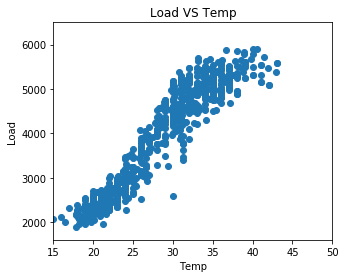

In [12]:
%matplotlib inline
plt.figure(figsize=(5, 4))
plt.title("Load VS Temp")
plt.xlabel("Temp")
plt.ylabel("Load")
plt.axis([15, 50,1600,6500])
plt.scatter(Temp_1, Load_1)
plt.show()

In [505]:
#%matplotlib inline
##fig, axis = plt.subplots()
#plt.figure(figsize=(5, 4))
#plt.title("Load VS Temp")
#plt.xlabel("Temp")
#plt.ylabel("Load")
#plt.axis([15, 50,1600,6500])
#plt.scatter(Temp_t['10'], Load_l['10'])
#plt.show()